## Add necessary imports

In [1]:
import ipywidgets as widgets
from IPython.display import display 
from ipywidgets import interact 
from functions import *

# Get initial conflict data filtered

In [4]:
warnings.filterwarnings("ignore")
data = pd.read_csv('../docs/conflicts_events_FULL_filtered.csv', low_memory=False)
data

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
0,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4
1,327,Angola: Government,2000-01-01T00:00:00,2000-11-10T00:00:00,0,0,0,1,-13.000000,20.500000,Angola,4
2,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3
3,386,Algeria: Government,2000-01-01T00:00:00,2000-01-01T00:00:00,2,0,0,1,36.855833,3.866667,Algeria,4
4,352,Chechen Republic of Ichkeria - Civilians,2000-01-01T00:00:00,2000-01-11T00:00:00,0,0,0,3,43.305800,45.747700,Russia (Soviet Union),3
...,...,...,...,...,...,...,...,...,...,...,...,...
5517259,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,0,0,0,1,19.707865,94.689569,Myanmar (Burma),3
5517260,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,0,0,0,1,19.707865,94.689569,Myanmar (Burma),3
5517261,337,Somalia: Government,2022-12-31T00:00:00,2022-12-31T00:00:00,2,0,0,1,-0.358173,42.545365,Somalia,4
5517262,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,1,0,0,1,21.457450,95.391822,Myanmar (Burma),3


In [5]:
print("Número de eventos en todos los datos:", data.shape[0])

Número de eventos en todos los datos: 5517264


In [ ]:
## Get events on conflicts filtered

In [6]:
conteo_conflictos = data['conflict_id'].value_counts().reset_index()
conteo_conflictos.columns = ['conflict_id', 'conflict_count']
data = data.merge(conteo_conflictos, on='conflict_id')
data


,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x,conflict_count
0,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4,21142
1,327,Angola: Government,2000-01-01T00:00:00,2000-11-10T00:00:00,0,0,0,1,-13.000000,20.500000,Angola,4,6734
2,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3,191400
3,386,Algeria: Government,2000-01-01T00:00:00,2000-01-01T00:00:00,2,0,0,1,36.855833,3.866667,Algeria,4,55361
4,352,Chechen Republic of Ichkeria - Civilians,2000-01-01T00:00:00,2000-01-11T00:00:00,0,0,0,3,43.305800,45.747700,Russia (Soviet Union),3,57528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517259,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,0,0,0,1,19.707865,94.689569,Myanmar (Burma),3,75366
5517260,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,0,0,0,1,19.707865,94.689569,Myanmar (Burma),3,75366
5517261,337,Somalia: Government,2022-12-31T00:00:00,2022-12-31T00:00:00,2,0,0,1,-0.358173,42.545365,Somalia,4,159357
5517262,222,Myanmar (Burma): Government,2022-12-31T00:00:00,2022-12-31T00:00:00,1,0,0,1,21.457450,95.391822,Myanmar (Burma),3,75366


In [13]:
data_simplified = data.groupby('conflict_id').agg({    
    'conflict_name': 'first',    
    'conflict_count': 'first',
    'date_start': 'first',
    'date_end': 'last',
    'best': 'sum',
    'deaths_civilians': 'sum',
    'type_of_violence': 'max',
    'latitude': 'mean',
    'longitude': 'mean',
    'country': 'first',
    'region_x': 'first',
}).reset_index()

data_simplified.head()

,conflict_id,conflict_name,conflict_count,date_start,date_end,best,deaths_civilians,type_of_violence,latitude,longitude,country,region_x
0,205,Iran: Kurdistan,817,2016-05-03T00:00:00,2022-11-21T00:00:00,2489,171,1,36.377416,45.322767,Iran,2
1,208,PIJ - Civilians,328,2000-11-02T00:00:00,2021-12-16T00:00:00,1224,1160,3,31.818996,34.938663,Israel,3
2,209,Philippines: Government,102358,2000-02-02T00:00:00,2022-11-30T00:00:00,298107,30378,3,11.856419,119.569161,Philippines,3
3,211,AMB - Civilians,72,2000-12-31T00:00:00,2006-08-13T00:00:00,164,163,3,32.006607,35.119317,Israel,1
4,218,India - Pakistan,22248,2000-01-01T00:00:00,2021-02-03T00:00:00,43308,22518,1,33.489231,74.319313,Pakistan,3


In [14]:
print("Número de filas de todos los datos simplificados:", data_simplified.shape[0])

Número de filas de todos los datos simplificados: 174


In [15]:
data_simplified.sort_values(by=['conflict_count'], ascending=[ False]).head(10)

,conflict_id,conflict_name,conflict_count,date_start,date_end,best,deaths_civilians,type_of_violence,latitude,longitude,country,region_x
55,333,Afghanistan: Government,1623465,2000-01-02T00:00:00,2022-12-31T00:00:00,10490805,629235,1,33.776878,66.933340,Afghanistan,3
35,299,Syria: Government,1108111,2011-07-30T00:00:00,2022-12-31T00:00:00,4842671,1424464,1,34.634062,36.812773,Syria,2
13,234,Israel: Palestine,516516,2000-03-02T00:00:00,2022-12-30T00:00:00,3083454,2584296,3,26.247551,35.622869,Israel,2
30,289,Colombia: Government,256012,2000-01-04T00:00:00,2022-12-06T00:00:00,849874,39034,1,5.259493,-74.668254,Colombia,5
17,259,Iraq: Government,196448,2003-12-12T00:00:00,2022-12-28T00:00:00,2173536,318560,1,34.605296,43.418232,Iraq,2
70,364,India: Kashmir,191400,2000-01-01T00:00:00,2022-12-28T00:00:00,450483,20262,1,33.798703,74.761913,India,3
57,337,Somalia: Government,159357,2001-05-11T00:00:00,2022-12-31T00:00:00,1001121,131769,1,2.466060,44.600099,Somalia,4
10,230,Yemen (North Yemen): Government,111216,2009-11-03T00:00:00,2022-12-30T00:00:00,1645140,192220,1,14.880624,44.653407,Yemen (North Yemen),2
2,209,Philippines: Government,102358,2000-02-02T00:00:00,2022-11-30T00:00:00,298107,30378,3,11.856419,119.569161,Philippines,3
65,354,Turkey: Kurdistan,101308,2000-03-02T00:00:00,2022-12-26T00:00:00,367802,13034,1,37.671143,42.159592,Turkey,2


## PLOT Number of conflicts by country

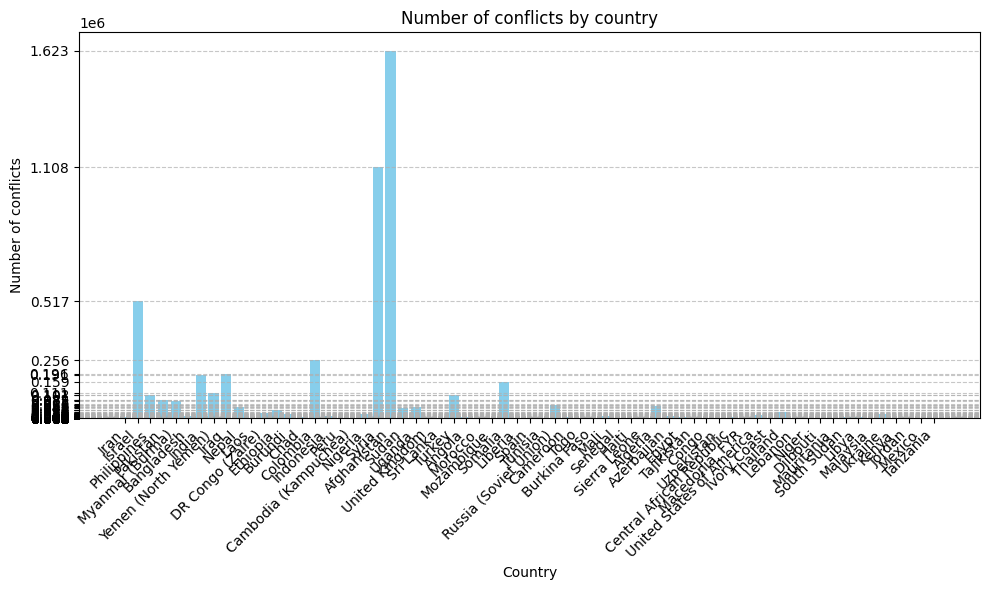

FileNotFoundError: [Errno 2] No such file or directory: 'html/01_conflictos_por_pais.html'

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(data_simplified['country'], data_simplified['conflict_count'], color='skyblue')
plt.title('Number of conflicts by country')
plt.xlabel('Country')
plt.ylabel('Number of conflicts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Establecer manualmente las etiquetas del eje y
plt.yticks(data_simplified['conflict_count'])

# Mostrar la gráfica
plt.tight_layout()
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

# Guardar el HTML en un archivo
with open('html/01_conflictos_por_pais.html', 'w') as file:
    file.write(html_output)

# Number of conflicts in the Middle East by country

In [20]:
data = pd.read_csv('../docs/conflicts_events_FULL_filtered.csv', low_memory=False)
paises_oriente_proximo = ['Iran', 'Israel', 'Pakistan', 'Iraq', 'Turkey', 'Syria', 'Jordan']
data_oriente_proximo = data[data['country'].isin(paises_oriente_proximo)]
data_oriente_proximo.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
16,218,India - Pakistan,2000-01-01T00:00:00,2000-01-02T00:00:00,1,1,0,1,34.3034,73.8878,Pakistan,3
19,218,India - Pakistan,2000-01-01T00:00:00,2000-01-02T00:00:00,1,1,0,1,34.3034,73.8878,Pakistan,3
22,218,India - Pakistan,2000-01-01T00:00:00,2000-01-02T00:00:00,1,1,0,1,34.3034,73.8878,Pakistan,3
53,218,India - Pakistan,2000-01-01T00:00:00,2000-01-02T00:00:00,1,1,0,1,34.3034,73.8878,Pakistan,3
88,218,India - Pakistan,2000-01-01T00:00:00,2000-01-02T00:00:00,1,1,0,1,34.3034,73.8878,Pakistan,3


Number total of conflicts in the Middle East by country

In [21]:
conteo_conflictos = data['conflict_id'].value_counts().reset_index()
conteo_conflictos.columns = ['conflict_id', 'conflict_count']
data = data.merge(conteo_conflictos, on='conflict_id')
conflicts_by_day = data.groupby('date_start').size().reset_index(name='conflict_count')
conflicts_by_day_sorted = conflicts_by_day.sort_values(by=['date_start', 'conflict_count'], ascending=[True, False])
conflicts_by_day_sorted.shape[0]

8401

Number total of conflicts in the Middle East by country paises_oriente_proximo = ['Iran', 'Israel', 'Pakistan', 'Yemen (North Yemen)', 'Iraq', 'Turkey', 'Syria', 'Jordan', 'Lebanon']

In [22]:
conflicts_by_day_sorted['date_start'] = pd.to_datetime(conflicts_by_day_sorted['date_start'])
conflicts_by_day_sorted = fill_nan_data(conflicts_by_day_sorted, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'),'date_start','conflict_count')

In [23]:
conflicts_by_day_sorted.shape[0]

1461

# View number of conflicts on the interval '2011-01-01' - '2014-12-31' on countries: paises_oriente_proximo = ['Iran', 'Israel', 'Pakistan', 'Yemen (North Yemen)', 'Iraq', 'Turkey', 'Syria', 'Jordan', 'Lebanon']

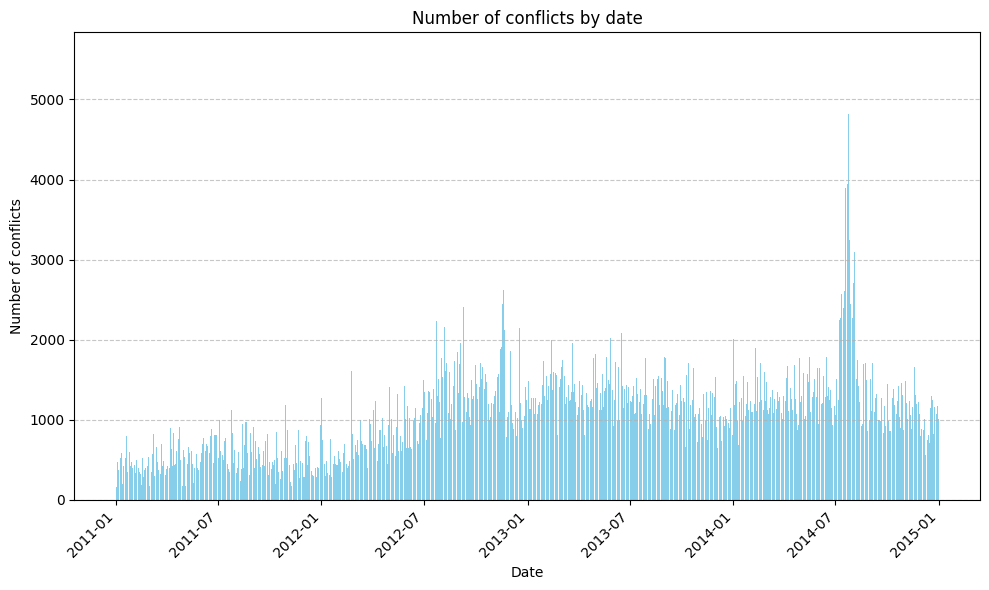

FileNotFoundError: [Errno 2] No such file or directory: 'html/05_conflictos_por_pais.html'

<Figure size 640x480 with 0 Axes>

In [15]:

plt.figure(figsize=(10, 6))
plt.bar(conflicts_by_day_sorted['date_start'], conflicts_by_day_sorted['conflict_count'], color='skyblue')
plt.title('Number of conflicts by date')
plt.xlabel('Date')
plt.ylabel('Number of conflicts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar la gráfica
plt.tight_layout()
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

# Guardar el HTML en un archivo
with open('html/05_conflictos_por_pais.html', 'w') as file:
    file.write(html_output)


# Correlation analisis 

In [2]:
data = pd.read_csv('../docs/Repsol_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Repsol', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));


interactive(children=(Text(value='Repsol', description='Stock Name:'), Output()), _dom_classes=('widget-intera…

In [3]:
# 1. Agrupar los datos de eventos de conflicto por meses
conflicts_by_month = conflicts_by_day_sorted.groupby(conflicts_by_day_sorted['date_start'].dt.to_period('M')).sum()

NameError: name 'conflicts_by_day_sorted' is not defined

In [55]:
data_BP_plc = pd.read_csv('../docs/BP plc_data.csv', low_memory=False)
data_BP_plc['Date'] = pd.to_datetime(data_BP_plc['Date'])
data_BP_plc = data_BP_plc[(data_BP_plc['Date'] >= '2011-01-01') & (data_BP_plc['Date'] <= '2014-12-31')]
data_BP_plc.set_index('Date', inplace=True)
data_BP_plc = fill_nan_data(data_BP_plc, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')
Saudi_Arabian_plc = pd.read_csv('../docs/Saudi Arabian Oil Company (Aramco)_data.csv', low_memory=False)
Saudi_Arabian_plc['Date'] = pd.to_datetime(data_BP_plc['Date'])
Saudi_Arabian_plc = Saudi_Arabian_plc[(Saudi_Arabian_plc['Date'] >= '2011-01-01') & (Saudi_Arabian_plc['Date'] <= '2014-12-31')]
Saudi_Arabian_plc.set_index('Date', inplace=True)
Saudi_Arabian_plc = fill_nan_data(Saudi_Arabian_plc, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

Gazprom_data = pd.read_csv('../docs/Gazprom_data.csv', low_memory=False)
Gazprom_data['Date'] = pd.to_datetime(data_BP_plc['Date'])
Gazprom_data = Gazprom_data[(Gazprom_data['Date'] >= '2011-01-01') & (Gazprom_data['Date'] <= '2014-12-31')]
Gazprom_data.set_index('Date', inplace=True)
Gazprom_data = fill_nan_data(Gazprom_data, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

Schlumberger_data = pd.read_csv('../docs/Schlumberger Limited_data.csv', low_memory=False)
Schlumberger_data['Date'] = pd.to_datetime(data_BP_plc['Date'])
Schlumberger_data = Schlumberger_data[(Schlumberger_data['Date'] >= '2011-01-01') & (Schlumberger_data['Date'] <= '2014-12-31')]
Schlumberger_data.set_index('Date', inplace=True)
Schlumberger_data = fill_nan_data(Schlumberger_data, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

data_repsol = pd.read_csv('../docs/Repsol_data.csv', low_memory=False)
data_repsol['Date'] = pd.to_datetime(data_repsol['Date'])
data_repsol = data_repsol[(data_repsol['Date'] >= '2011-01-01') & (data_repsol['Date'] <= '2014-12-31')]
data_repsol.set_index('Date', inplace=True)
data_repsol = fill_nan_data(data_repsol, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_solaria.csv
data_solaria = pd.read_csv('../docs/Solaria_data.csv', low_memory=False)
data_solaria['Date'] = pd.to_datetime(data_solaria['Date'])
data_solaria = data_solaria[(data_solaria['Date'] >= '2011-01-01') & (data_solaria['Date'] <= '2014-12-31')]
data_solaria = fill_nan_data(data_solaria, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_solaredge.csv
data_solaredge = pd.read_csv('../docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data_solaredge['Date'] = pd.to_datetime(data_solaredge['Date'])
data_solaredge = data_solaredge[(data_solaredge['Date'] >= '2011-01-01') & (data_solaredge['Date'] <= '2014-12-31')]
data_solaredge.set_index('Date', inplace=True)
data_solaredge = fill_nan_data(data_solaredge, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_enagas.csv
data_enagas = pd.read_csv('../docs/Enagas_data.csv', low_memory=False)
data_enagas['Date'] = pd.to_datetime(data_enagas['Date'])
data_enagas = data_enagas[(data_enagas['Date'] >= '2011-01-01') & (data_enagas['Date'] <= '2014-12-31')]
data_enagas.set_index('Date', inplace=True)
data_enagas = fill_nan_data(data_enagas, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_acciona.csv
data_acciona = pd.read_csv('../docs/Acciona_data.csv', low_memory=False)
data_acciona['Date'] = pd.to_datetime(data_acciona['Date'])
data_acciona = data_acciona[(data_acciona['Date'] >= '2011-01-01') & (data_acciona['Date'] <= '2014-12-31')]
data_acciona.set_index('Date', inplace=True)
data_acciona = fill_nan_data(data_acciona, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_nextera.csv
data_nextera = pd.read_csv('../docs/NextEra Energy, Inc._data.csv', low_memory=False)
data_nextera['Date'] = pd.to_datetime(data_nextera['Date'])
data_nextera = data_nextera[(data_nextera['Date'] >= '2011-01-01') & (data_nextera['Date'] <= '2014-12-31')]
data_nextera.set_index('Date', inplace=True)
data_nextera = fill_nan_data(data_nextera, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_iberdrola.csv
data_iberdrola = pd.read_csv('../docs/Iberdrola_data.csv', low_memory=False)
data_iberdrola['Date'] = pd.to_datetime(data_iberdrola['Date'])
data_iberdrola = data_iberdrola[(data_iberdrola['Date'] >= '2011-01-01') & (data_iberdrola['Date'] <= '2014-12-31')]
data_iberdrola = fill_nan_data(data_iberdrola, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_kinder.csv
data_kinder = pd.read_csv('../docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data_kinder['Date'] = pd.to_datetime(data_kinder['Date'])
data_kinder = data_kinder[(data_kinder['Date'] >= '2011-01-01') & (data_kinder['Date'] <= '2014-12-31')]
data_kinder.set_index('Date', inplace=True)
data_kinder = fill_nan_data(data_kinder, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_honeywell.csv
data_honeywell = pd.read_csv('../docs/Honeywell International Inc._data.csv', low_memory=False)
data_honeywell['Date'] = pd.to_datetime(data_honeywell['Date'])
data_honeywell = data_honeywell[(data_honeywell['Date'] >= '2011-01-01') & (data_honeywell['Date'] <= '2014-12-31')]
data_honeywell.set_index('Date', inplace=True)
data_honeywell = fill_nan_data(data_honeywell, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_exxon.csv
data_exxon = pd.read_csv('../docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data_exxon['Date'] = pd.to_datetime(data_exxon['Date'])
data_exxon = data_exxon[(data_exxon['Date'] >= '2011-01-01') & (data_exxon['Date'] <= '2014-12-31')]
data_exxon.set_index('Date', inplace=True)
data_exxon = fill_nan_data(data_exxon, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')

# Cargar y filtrar data_tecnicas.csv
data_tecnicas = pd.read_csv('../docs/Técnicas Reunidas_data.csv', low_memory=False)
data_tecnicas['Date'] = pd.to_datetime(data_tecnicas['Date'])
data_tecnicas = data_tecnicas[(data_tecnicas['Date'] >= '2011-01-01') & (data_tecnicas['Date'] <= '2014-12-31')]
data_tecnicas.set_index('Date', inplace=True)
data_tecnicas = fill_nan_data(data_tecnicas, pd.to_datetime('2011-08-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')


In [60]:
correlaciones_por_dataset = []
# Calcular la correlación para cada conjunto de datos
for data, nombre_dataset in [(data_repsol, 'Repsol'),
                             (data_solaria, 'Solaria'), 
                             (data_enagas, 'Enagas'), 
                             (data_acciona, 'Acciona'), 
                             (data_nextera, 'NextEra'), 
                             (data_iberdrola, 'Iberdrola'), 
                             (data_kinder, 'Kinder'), 
                             (data_honeywell, 'Honeywell'), 
                             (data_exxon, 'Exxon'), 
                             (data_tecnicas, 'Tecnicas'),
                             (data_BP_plc, 'BP'),
                             (Gazprom_data, 'Gazprom'),    
                             (Saudi_Arabian_plc, "Saudi_Arabian_plc"),
                             (Schlumberger_data, 'Schlumberger')]:
    data['Month'] = data['Date'].dt.to_period('M')
    data_por_mes = data.groupby('Month').mean()

    # 2. Calcular la correlación entre los eventos de conflicto y el volumen de acciones para cada mes
    correlacion = conflicts_by_month['conflict_count'].corr(data_por_mes['Volume'])
    print(f'Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para {nombre_dataset}: {correlacion}')
    
    # Agregar la correlación a la lista de correlaciones por dataset
    correlaciones_por_dataset.append((nombre_dataset, correlacion))

# Crear un DataFrame a partir de la lista de correlaciones por dataset
df_correlaciones = pd.DataFrame(correlaciones_por_dataset, columns=['Dataset', 'Correlación'])

# Mostrar la tabla de correlaciones
print(df_correlaciones)


Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Repsol: -0.35203006777657336
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Solaria: -0.3488755635885259
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Enagas: 0.15633205328375524
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Acciona: -0.29393697032542654
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para NextEra: -0.22785408100904642
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Iberdrola: -0.013156149528592767
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Kinder: 0.23867808547796773
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Honeywell: -0.48331188617219545
Correlación entre eventos

### Check correlation with close 

In [63]:
correlaciones_por_dataset = []
# Calcular la correlación para cada conjunto de datos
for data, nombre_dataset in [(data_repsol, 'Repsol'),
                             (data_solaria, 'Solaria'), 
                             (data_enagas, 'Enagas'), 
                             (data_acciona, 'Acciona'), 
                             (data_nextera, 'NextEra'), 
                             (data_iberdrola, 'Iberdrola'), 
                             (data_kinder, 'Kinder'), 
                             (data_honeywell, 'Honeywell'), 
                             (data_exxon, 'Exxon'), 
                             (data_tecnicas, 'Tecnicas'),
                             (data_BP_plc, 'BP'),
                             (Gazprom_data, 'Gazprom'),    
                             (Saudi_Arabian_plc, "Saudi_Arabian_plc"),
                             (Schlumberger_data, 'Schlumberger')]:
    data['Month'] = data['Date'].dt.to_period('M')
    data_por_mes = data.groupby('Month').mean()

    # 2. Calcular la correlación entre los eventos de conflicto y el volumen de acciones para cada mes
    correlacion = conflicts_by_month['conflict_count'].corr(data_por_mes['Adj Close'])
    print(f'Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para {nombre_dataset}: {correlacion}')
    
    # Agregar la correlación a la lista de correlaciones por dataset
    correlaciones_por_dataset.append((nombre_dataset, correlacion))

# Crear un DataFrame a partir de la lista de correlaciones por dataset
df_correlaciones = pd.DataFrame(correlaciones_por_dataset, columns=['Dataset', 'Correlación'])

# Mostrar la tabla de correlaciones de cierre del mercado
print(df_correlaciones)

Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Repsol: -0.1715166307690455
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Solaria: -0.44610096959774204
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Enagas: 0.5808502495392805
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Acciona: -0.26756249129749027
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para NextEra: 0.68319119555455
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Iberdrola: -0.018839753920058155
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Kinder: 0.6840652495518651
Correlación entre eventos de conflicto y el volumen de la acción a lo largo del tiempo para Honeywell: 0.6129853573151492
Correlación entre eventos de conf

In [66]:
# Crear un DataFrame para almacenar los datos de volumen y close de todas las empresas
df_all_data = pd.DataFrame()

energy_sector = [
    {"sector": "Oil&Gas",
     "companies": [
         {"name": "Repsol", "country": "Spain", "symbol": "REP.MC", "data": []},
         {"name": "Exxon Mobil Corporation", "country": "USA", "symbol": "XOM", "data": []},
         {"name": "Saudi Arabian Oil Company (Aramco)", "country": "Saudi Arabia", "symbol": "2222.SR", "data": []},
         {"name": "Gazprom", "country": "Russia", "symbol": "GAZP.ME", "data": []},
         {"name": "BP plc", "country": "UK", "symbol": "BP", "data": []}
     ]},
    {"sector": "ElectricPower",
     "companies": [
         {"name": "Iberdrola", "country": "Spain", "symbol": "IBE.MC", "data": []},
         {"name": "NextEra Energy, Inc.", "country": "USA", "symbol": "NEE", "data": []}
     ]},
    {"sector": "RenewableEnergy",
     "companies": [
         {"name": "Acciona", "country": "Spain", "symbol": "ANA.MC", "data": []},
         {"name": "Solaria", "country": "Spain", "symbol": "SOL", "data": []},
         {"name": "Solaredge Technologies Inc.", "country": "USA", "symbol": "SEDG", "data": []}
     ]},
    {"sector": "EnergyServices",
     "companies": [
         {"name": "Técnicas Reunidas", "country": "Spain", "symbol": "TRE.MC", "data": []},
         {"name": "Honeywell International Inc.", "country": "USA", "symbol": "HON", "data": []},
         {"name": "Schlumberger Limited", "country": "USA", "symbol": "SLB", "data": []}
     ]},
    {"sector": "Infrastructure",
     "companies": [
         {"name": "Enagas", "country": "Spain", "symbol": "ENG.MC", "data": []},
         {"name": "Kinder Morgan, Inc.", "country": "USA", "symbol": "KMI", "data": []}
     ]}
]

# Agregar los datos de volumen y close de cada empresa al DataFrame
for sector in energy_sector:
    for company in sector['companies']:
        # Leer los datos de la empresa
        data = pd.read_csv(f'../docs/{company["name"]}_data.csv', low_memory=False)
        data['Date'] = pd.to_datetime(data['Date'])
        data = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2014-12-31')]
        data.set_index('Date', inplace=True)
        data = fill_nan_data(data, pd.to_datetime('2011-01-01'), pd.to_datetime('2014-12-31'), 'Date', 'Volume')
        
        # Agregar los datos de volumen y close al DataFrame
        df_all_data[company["name"] + "_Volume"] = data['Volume']
        df_all_data[company["name"] + "_Close"] = data['Close']

# Calcular la correlación entre todas las empresas por volumen y por close
correlation_volume = df_all_data.corr(method='pearson').filter(like='_Volume').dropna(axis=0, how='all').dropna(axis=1, how='all')
correlation_close = df_all_data.corr(method='pearson').filter(like='_Close').dropna(axis=0, how='all').dropna(axis=1, how='all')

print("Correlación entre todas las empresas por volumen:")
print(correlation_volume)

print("\nCorrelación entre todas las empresas por close:")
print(correlation_close)


Correlación entre todas las empresas por volumen:
                                     Repsol_Volume  \
Repsol_Volume                             1.000000   
Repsol_Close                              0.079905   
Exxon Mobil Corporation_Volume            0.144545   
Exxon Mobil Corporation_Close            -0.122007   
Gazprom_Volume                            0.152312   
Gazprom_Close                             0.124736   
BP plc_Volume                             0.077621   
BP plc_Close                              0.006803   
Iberdrola_Volume                          0.175098   
Iberdrola_Close                           0.062566   
NextEra Energy, Inc._Volume               0.036543   
NextEra Energy, Inc._Close               -0.122953   
Acciona_Volume                            0.093891   
Acciona_Close                             0.081610   
Solaria_Volume                            0.019045   
Solaria_Close                             0.021825   
Técnicas Reunidas_Volume        

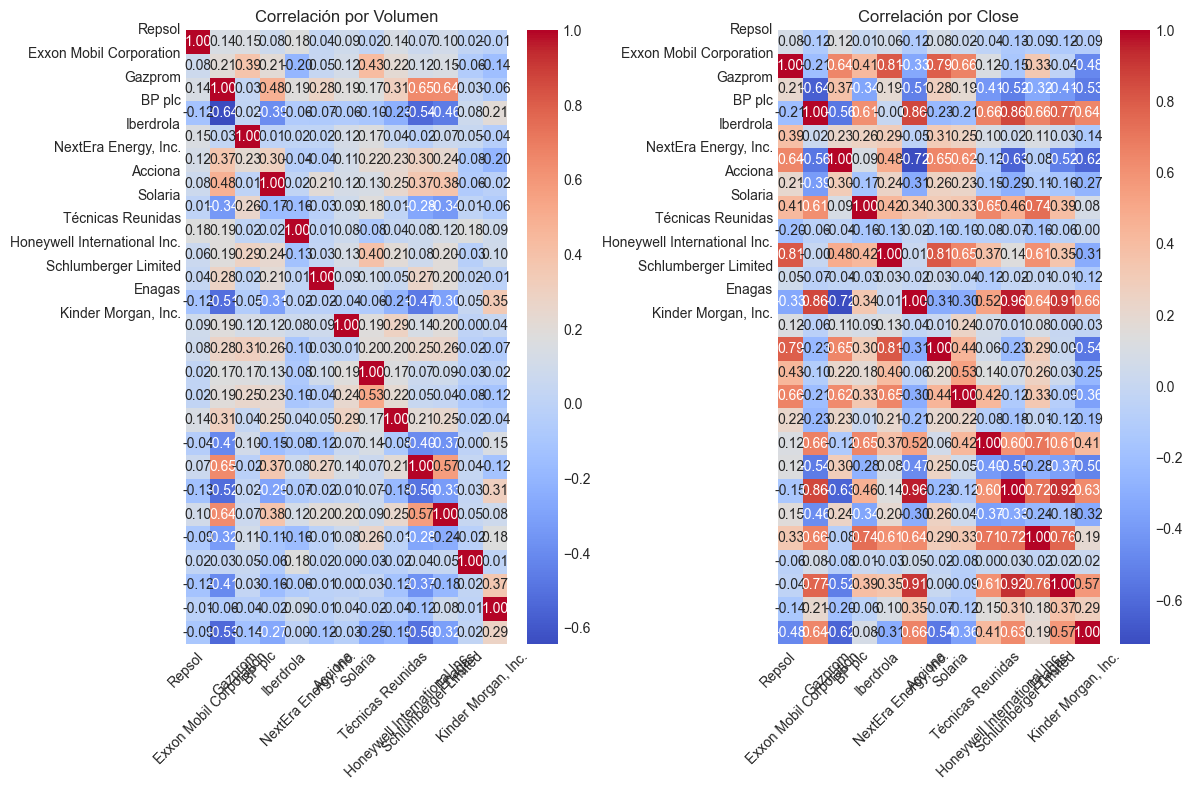

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

# Obtener los nombres de las acciones
company_names = [name.split("_")[0] for name in correlation_volume.columns]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Mapa de calor para la correlación por volumen
plt.subplot(1, 2, 1)
sns.heatmap(correlation_volume, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación por Volumen')
plt.xticks(ticks=range(len(company_names)), labels=company_names, rotation=45)
plt.yticks(ticks=range(len(company_names)), labels=company_names, rotation=0)

# Mapa de calor para la correlación por close
plt.subplot(1, 2, 2)
sns.heatmap(correlation_close, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación por Close')
plt.xticks(ticks=range(len(company_names)), labels=company_names, rotation=45)
plt.yticks(ticks=range(len(company_names)), labels=company_names, rotation=0)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Guardar el gráfico en HTML
mpld3.save_html(plt.gcf(), 'correlation_heatmaps_with_names.html')


# Plot data_middle_east by country

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data['conflict_name'], data['conflict_count'], color='skyblue')
plt.title('Número de eventos por nombre de conflicto')
plt.xlabel('Nombre de conflicto')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

# Guardar el HTML en un archivo
with open('html/02_eventos_por_nombre_conflicto.html', 'w') as file:
    file.write(html_output)

## Rad full csv to get best intervals

In [25]:
data_full = pd.read_csv('../docs/conflicts_events_FULL_filtered.csv', low_memory=False)
data_full.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
0,329,Ethiopia: Ogaden,2000-01-01T00:00:00,2000-01-23T00:00:00,0,0,0,1,7.000000,44.000000,Ethiopia,4
1,327,Angola: Government,2000-01-01T00:00:00,2000-11-10T00:00:00,0,0,0,1,-13.000000,20.500000,Angola,4
2,364,India: Kashmir,2000-01-01T00:00:00,2000-10-15T00:00:00,153,0,153,1,33.916670,76.666670,India,3
3,386,Algeria: Government,2000-01-01T00:00:00,2000-01-01T00:00:00,2,0,0,1,36.855833,3.866667,Algeria,4
4,352,Chechen Republic of Ichkeria - Civilians,2000-01-01T00:00:00,2000-01-11T00:00:00,0,0,0,3,43.305800,45.747700,Russia (Soviet Union),3


# Getting  data from best intervals from 

In [26]:
#Year 2011: 189442 conflicts
#Year 2012: 385194 conflicts
#Year 2013: 467585 conflicts
data_full['date_start'] = pd.to_datetime(data_full['date_start'])
data_full['date_end'] = pd.to_datetime(data_full['date_end'])

# Filtrar los datos desde el año 2011 hasta finales de 2013
data_filtered = data_full[(data_full['date_start'] >= '2011-08-01') & (data_full['date_end'] <= '2014-12-31')]

data_filtered.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
1552890,309,Sudan: Government,2011-01-01,2011-05-01,0,0,0,1,13.000000,25.000000,Sudan,4
1552891,333,Afghanistan: Government,2011-01-01,2011-01-01,1,0,0,1,31.000000,64.000000,Afghanistan,3
1552892,364,India: Kashmir,2011-01-01,2011-01-01,2,0,0,1,33.319889,75.068477,India,3
1552893,333,Afghanistan: Government,2011-01-01,2011-01-01,2,0,0,1,34.954550,70.914272,Afghanistan,3
1552894,364,India: Kashmir,2011-01-01,2011-01-31,2,0,0,1,33.916670,76.666670,India,3


In [27]:
data_filtered.shape[0]

1042221

# View data filtered on heatmap

In [22]:
from functions import create_heatmap_full
mapa = create_heatmap_full(data_filtered = data_filtered)
display(mapa)

In [7]:
data_filtered.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
1552890,309,Sudan: Government,2011-01-01,2011-05-01,0,0,0,1,13.000000,25.000000,Sudan,4
1552891,333,Afghanistan: Government,2011-01-01,2011-01-01,1,0,0,1,31.000000,64.000000,Afghanistan,3
1552892,364,India: Kashmir,2011-01-01,2011-01-01,2,0,0,1,33.319889,75.068477,India,3
1552893,333,Afghanistan: Government,2011-01-01,2011-01-01,2,0,0,1,34.954550,70.914272,Afghanistan,3
1552894,364,India: Kashmir,2011-01-01,2011-01-31,2,0,0,1,33.916670,76.666670,India,3


# Analisis from shares of stock with conflicts

## Analysis of the evolution of events in conflicts in  the period '2011-08-01' - '2014-12-31'

In [59]:
data_full = pd.read_csv('../docs/conflicts_events_FULL_filtered.csv', low_memory=False)
data_full['date_start'] = pd.to_datetime(data_full['date_start'])
data_full['date_end'] = pd.to_datetime(data_full['date_end'])
data_full.head()

,conflict_id,conflict_name,date_start,date_end,best,deaths_civilians,deaths_unknown,type_of_violence,latitude,longitude,country,region_x
0,329,Ethiopia: Ogaden,2000-01-01,2000-01-23,0,0,0,1,7.000000,44.000000,Ethiopia,4
1,327,Angola: Government,2000-01-01,2000-11-10,0,0,0,1,-13.000000,20.500000,Angola,4
2,364,India: Kashmir,2000-01-01,2000-10-15,153,0,153,1,33.916670,76.666670,India,3
3,386,Algeria: Government,2000-01-01,2000-01-01,2,0,0,1,36.855833,3.866667,Algeria,4
4,352,Chechen Republic of Ichkeria - Civilians,2000-01-01,2000-01-11,0,0,0,3,43.305800,45.747700,Russia (Soviet Union),3


In [13]:
data_filtered.head()

NameError: name 'data_filtered' is not defined

### Add event count for conflicts

In [44]:
conflicts_by_day = data_filtered.groupby('date_start').size().reset_index(name='conflict_count')
conflicts_by_day_sorted = conflicts_by_day.sort_values(by="conflict_count", ascending=False)
conflicts_by_day_sorted.head()
intervalos_resultados_buenos_bajada_dict = {}

intervalos_resultados_buenos_subida_dict = {}


### Add plot with the count for conflicts

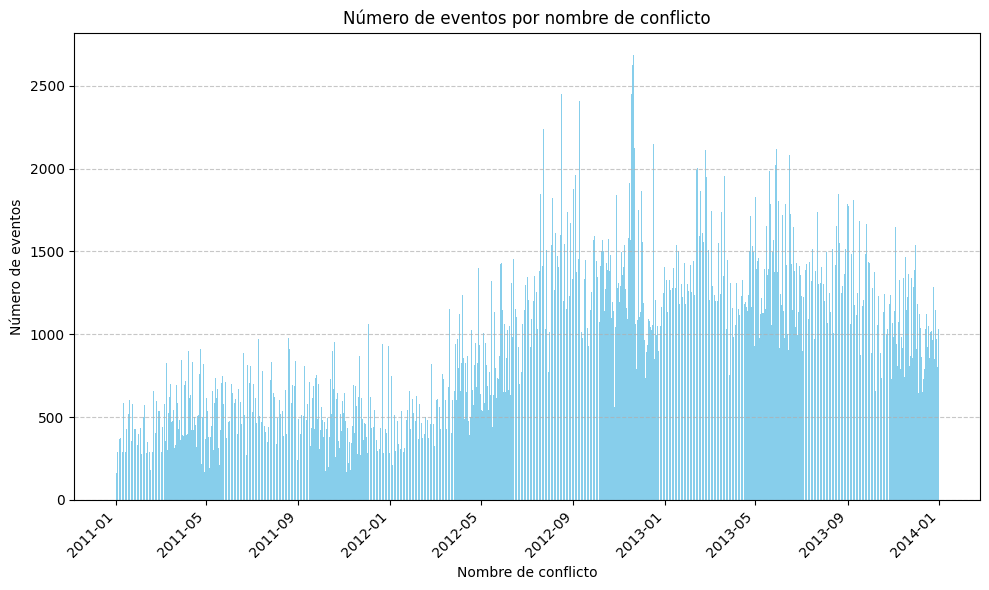

FileNotFoundError: [Errno 2] No such file or directory: 'html/04_number_conflicts_per_day.html'

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(conflicts_by_day_sorted['date_start'], conflicts_by_day_sorted['conflict_count'], color='skyblue')
plt.title('Número de eventos por nombre de conflicto')
plt.xlabel('Nombre de conflicto')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
html_output = mpld3.fig_to_html(plt.gcf())

with open('html/04_number_conflicts_per_day.html', 'w') as file:
    file.write(html_output)

### Add days and get intervals of conflicts

In [ ]:
# Calcular la diferencia entre fechas consecutivas
conflicts_by_day_sorted['date_start'] = pd.to_datetime(conflicts_by_day_sorted['date_start'])
conflicts_by_day_sorted['date_diff'] = conflicts_by_day_sorted['date_start'].diff()

intervalos_fechas = conflicts_by_day_sorted[conflicts_by_day_sorted['date_diff'] > pd.Timedelta(days=1)]
intervalos_fechas.sort_values(by="date_diff", ascending=False)
# Mostrar los intervalos de fechas
print(intervalos_fechas)


### Analysis of the evolution of the Repsol share price  in the period '2011-08-01' - '2014-12-31'

In [46]:
data = pd.read_csv('../docs/Repsol_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Repsol', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

<Figure size 640x480 with 0 Axes>

interactive(children=(Text(value='Repsol', description='Stock Name:'), Output()), _dom_classes=('widget-intera…


Analysis of the evolution of the Repsol share price down in the period '2011-08-01' - '2014-12-31'

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Repsol_data.csv', low_memory=False)

data['Date'] = pd.to_datetime(data['Date'])
date_start = pd.to_datetime('2011-08-01')
date_end = pd.to_datetime('2014-12-31')
data = data[(data['Date'] >= date_start) & (data['Date'] <= date_end)]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100

intervalos_resultados_buenos_subida_dict["Repsol"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")


Analysis of the evolution of the Repsol share price up in the period '2011-08-01' - '2014-12-31'

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Repsol_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100

intervalos_resultados_buenos_subida_dict["Repsol"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

### Porcentaje de Acciona d intervalos con correlación correcta subida - bajada de la accion

In [40]:
data = pd.read_csv('../docs/Acciona_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Acciona', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));


interactive(children=(Text(value='Acciona', description='Stock Name:'), Output()), _dom_classes=('widget-inter…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Acciona_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100

intervalos_resultados_buenos_bajada_dict["Acciona"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Acciona_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100

intervalos_resultados_buenos_subida_dict["Acciona"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

### Porcentaje de Enagas_data de intervalos con correlación correcta subida - bajada de la accion

In [42]:
data = pd.read_csv('../docs/Enagas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Enagas', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Enagas', description='Stock Name:'), Output()), _dom_classes=('widget-intera…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Enagas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["Enagas"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Enagas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Acciona"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

### Porcentaje de Exxon Mobil de intervalos con correlación correcta subida - bajada de la acción


In [43]:
data = pd.read_csv('../docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Exxon Mobil Corporation_data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Exxon Mobil Corporation_data', description='Stock Name:'), Output()), _dom_c…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["Exxon Mobil Corporation"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Exxon Mobil Corporation_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Exxon Mobil Corporation"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

### Porcentaje de Honeywell International Inc de intervalos con correlación correcta subida - bajada de la acción


In [44]:
data = pd.read_csv('../docs/Honeywell International Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Honeywell International Inc', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Honeywell International Inc', description='Stock Name:'), Output()), _dom_cl…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Honeywell International Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["Honeywell International Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Honeywell International Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Honeywell International Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

## Porcentaje de Iberdrola de intervalos con correlación correcta subida - bajada de la acción

In [45]:
data = pd.read_csv('../docs/Iberdrola_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Iberdrola', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Iberdrola', description='Stock Name:'), Output()), _dom_classes=('widget-int…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Iberdrola_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["Iberdrola"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Iberdrola_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Iberdrola"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

## Porcentaje de Kinder Morgan, Inc de intervalos con correlación correcta subida - bajada de la acción

In [46]:
data = pd.read_csv('../docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Kinder Morgan, Inc._data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='Kinder Morgan, Inc._data', description='Stock Name:'), Output()), _dom_class…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["Kinder Morgan, Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Kinder Morgan, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Kinder Morgan, Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

## Porcentaje de NextEra Energy de intervalos con correlación correcta subida - bajada de la acción

In [47]:
data = pd.read_csv('../docs/NextEra Energy, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='NextEra Energy, Inc._data.csv', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

interactive(children=(Text(value='NextEra Energy, Inc._data.csv', description='Stock Name:'), Output()), _dom_…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/NextEra Energy, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["NextEra Energy, Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/NextEra Energy, Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["NextEra Energy, Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

## Porcentaje de Solaredge Technologies Inc de intervalos con correlación correcta subida - bajada de la acción

In [48]:
data = pd.read_csv('../docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Solaredge Technologies Inc._data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

<Figure size 640x480 with 0 Axes>

interactive(children=(Text(value='Solaredge Technologies Inc._data', description='Stock Name:'), Output()), _d…

In [49]:
umbral = -0.5 

data = pd.read_csv('../docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Solaredge Technologies Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

Porcentaje de intervalos con correlación < -0.5: 0.00%


In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Solaredge Technologies Inc._data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Solaredge Technologies Inc"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

## Porcentaje de Solaria de intervalos con correlación correcta subida - bajada de la acción

In [51]:
data = pd.read_csv('../docs/Solaria_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Solaria_data', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

<Figure size 640x480 with 0 Axes>

interactive(children=(Text(value='Solaria_data', description='Stock Name:'), Output()), _dom_classes=('widget-…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Solaria_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100

intervalos_resultados_buenos_bajada_dict["Solaria"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Solaria_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Solaria"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

## Porcentaje de Técnicas Reunidas de intervalos con correlación correcta subida - bajada de la acción

In [54]:

data = pd.read_csv('../docs/Técnicas Reunidas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

data.set_index('Date', inplace=True)
years_available = sorted(data.index.year.unique())
interact(plot_all_data, name=widgets.Text(value='Técnicas Reunidas_data.csv', description='Stock Name:', disabled=False),
         data=widgets.fixed(data),
         year=widgets.Dropdown(options=years_available, description='Select Year:', disabled=False));

<Figure size 640x480 with 0 Axes>

interactive(children=(Text(value='Técnicas Reunidas_data.csv', description='Stock Name:'), Output()), _dom_cla…

In [ ]:
umbral = -0.5 

data = pd.read_csv('../docs/Técnicas Reunidas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_bajada_dict["Técnicas Reunidas"] = intervalos_filtrados
print(f"Porcentaje de intervalos con correlación < {umbral}: {porcentaje_buenos:.2f}%")

In [ ]:
umbral = 0.5 

data = pd.read_csv('../docs/Técnicas Reunidas_data.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])

data = data[(data['Date'] >= '2011-08-01') & (data['Date'] <= '2014-12-31')]

intervalos_filtrados = filtrar_intervalos_end(intervalos_fechas, data_full, data, umbral)    
total_intervalos = len(intervalos_fechas)
buenos_intervalos = len(intervalos_filtrados)
porcentaje_buenos = (buenos_intervalos / total_intervalos) * 100
intervalos_resultados_buenos_subida_dict["Técnicas Reunidas"] = intervalos_filtrados
print(f"Porcentaje de intervalos que tienen buenos resultados al final con correlación > {umbral}: {porcentaje_buenos:.2f}%")

In [58]:
for clave, valor in intervalos_resultados_buenos_subida_dict.items():
    print("Clave:", clave)
    print("Valor:", valor.atributo)
    
for clave, valor in intervalos_resultados_buenos_bajada_dict.items():
    print("Clave:", clave)
    print("Valor:", valor.atributo)

Clave: Repsol


AttributeError: 'int' object has no attribute 'atributo'